## **0. [Predict Future Sales - Kaggle Competition](https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales/data)**

*Informacje z Kaggle:* 

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

File descriptions
- sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
- test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
- sample_submission.csv - a sample submission file in the correct format.
- items.csv - supplemental information about the items/products.
- item_categories.csv  - supplemental information about the items categories.
- shops.csv- supplemental information about the shops.

Data fields

- ID - an Id that represents a (Shop, Item) tuple within the test set
- shop_id - unique identifier of a shop
- item_id - unique identifier of a product
- item_category_id - unique identifier of item category
- item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
- item_price - current price of an item
- date - date in format dd/mm/yyyy
- date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- item_name - name of item
- shop_name - name of shop
- item_category_name - name of item category

This dataset is permitted to be used for any purpose, including commercial use.

In [1]:
# x = np.random.beta(10, 2, size=1000)
# plt.hist(x, bins=100)
# xx = (x - x.mean()) / x.std()
# plt.hist(xx, bins=100)

In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 1. **Dane**
Zbiór danych składa się z 6 plików CSV: 
- sales_train.csv : dane historyczne sprzedazy produktów
- shops.csv: sklepy z nazwami
- item_categories.csv : kategorie produktów
- items.csv : produkty z nazwą, ID i ID kategorii
- test.csv : zbiór testowy na którym będzie sprawdzana skuteczność w Kaggle. Zawiera jedynie ID sklepu i produktu.
- sample_submission.csv : plik przedstawiający jak powinien wyglądać plik z predykcjami wrzucany do Kaggle.

In [3]:
"""
- dane w przedziale 2013-01-01 do 2015-10-31
- kolumna date_block_num - numer miesiąca w calym zbiorze (od 0 do 33)
- kolumna shop_id - unikalny identyfikator sklepu
- kolumna item_id - unikalny identyfikator produktu
- kolumna item_price - cena produktu, nieznormalizowana
- kolumna item_cnt_day - liczba sprzedanych produktów. Tą wartość będziemy przewidywać.
"""
pd.read_csv(".data/sales_train.csv")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [4]:
"""
- kolumna shop_name - nazwa produktu, cyrylica, j. rosyjski
"""
pd.read_csv(".data/shops.csv").sample(5)

,shop_name,shop_id
38,"Омск ТЦ ""Мега""",38
48,"Томск ТРЦ ""Изумрудный Город""",48
20,"Москва ""Распродажа""",20
53,"Уфа ТЦ ""Семья"" 2",53
57,"Якутск Орджоникидзе, 56",57


In [5]:
"""
- item_category_name - nazwa kategorii produktu, cyrylica, j. rosyjski
- niektore kategorie mogą wskazywać podobieństwo, np. PS2, PS3, PS4. Warto przetlumaczyc
"""
pd.read_csv(".data/item_categories.csv")

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [6]:
"""
- item_name - nazwa produktu, cyrylica, j. rosyjski
"""
pd.read_csv(".data/items.csv")

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [7]:
"""
- kolumna ID - identyfikator pary (sklep, produkt)
- Z Kaggle wiemy, że ten zbiór odnosi się do okresu 2015-11-01 do 2015-11-30, zatem bylby to date_block_num=34
- Inferencja odbywa się jedynie dla zadanego sklepu i produktu, nie posiadamy zadnej dodatkowej informacji, musimy je wywnioskować z danych treningowych
"""
pd.read_csv(".data/test.csv")

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [8]:
pd.read_csv(".data/sample_submission.csv")

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [9]:
sales_train = pd.read_csv(".data/sales_train.csv")
shops = pd.read_csv(".data/shops.csv")
item_categories = pd.read_csv(".data/item_categories.csv")
items = pd.read_csv(".data/items.csv")

df_full = pd.merge(sales_train, shops, on='shop_id')
df_full = pd.merge(df_full, items, on='item_id')
df_full = pd.merge(df_full, item_categories, on='item_category_id')
df_full = df_full[['date', 'date_block_num', 'shop_id', 'shop_name', 'item_id', 'item_name', 'item_category_id', 'item_category_name', 'item_price', 'item_cnt_day']]
df_full['date'] = pd.to_datetime(df_full['date'], format='%d.%m.%Y')
df_full = df_full.sort_values(by=['date', 'shop_id', 'item_id']).reset_index(drop=True)

df_full

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category_name,item_price,item_cnt_day
0,2013-01-01,0,2,"Адыгея ТЦ ""Мега""",991,"3D Action Puzzle ""Динозавры"" Тиранозавр",67,Подарки - Развитие,99.0,1.0
1,2013-01-01,0,2,"Адыгея ТЦ ""Мега""",1472,"Assassin's Creed 3 [Xbox 360, русская версия]",23,Игры - XBOX 360,2599.0,1.0
2,2013-01-01,0,2,"Адыгея ТЦ ""Мега""",1905,"Bestseller. Grand Theft Auto: San Andreas [PC,...",30,Игры PC - Стандартные издания,249.0,1.0
3,2013-01-01,0,2,"Адыгея ТЦ ""Мега""",2920,Disney. LEGO Пираты Карибского моря (Essential...,21,Игры - PSP,599.0,2.0
4,2013-01-01,0,2,"Адыгея ТЦ ""Мега""",3320,"FIFA 13 (с поддержкой PS Move) [PS3, русская в...",19,Игры - PS3,1999.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-31,33,59,"Ярославль ТЦ ""Альтаир""",20730,"Фигурка Scalers Wave 1 Alien 2""",72,Подарки - Фигурки,499.0,1.0
2935845,2015-10-31,33,59,"Ярославль ТЦ ""Альтаир""",20866,Фигурка Tom Clancy's Splinter Cell Blacklist S...,72,Подарки - Фигурки,699.0,1.0
2935846,2015-10-31,33,59,"Ярославль ТЦ ""Альтаир""",20949,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",5.0,1.0
2935847,2015-10-31,33,59,"Ярославль ТЦ ""Альтаир""",21369,ХОББИТ: БИТВА ПЯТИ ВОИНСТВ (регион),40,Кино - DVD,169.0,1.0


In [11]:
print(f"""
Statystyki liczności zbiorów zmiennych kategorycznych:
    - unique_shops: {df_full['shop_id'].nunique()}
    - unique_items: {df_full['item_id'].nunique()}
    - unique_categories: {df_full['item_category_id'].nunique()}
""")


Statystyki liczności zbiorów zmiennych kategorycznych:
    - unique_shops: 60
    - unique_items: 21807
    - unique_categories: 84



In [12]:
"""
W zbiorze nie występują dane brakujące, kazda kolumna ma prawidłowe wartości
"""
df_full.isna().any(axis=0)

date                  False
date_block_num        False
shop_id               False
shop_name             False
item_id               False
item_name             False
item_category_id      False
item_category_name    False
item_price            False
item_cnt_day          False
dtype: bool

In [13]:
df_full.describe()

,date,date_block_num,shop_id,item_id,item_category_id,item_price,item_cnt_day
count,2935849,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,2014-04-03 05:44:34.970680064,1.456991e+01,3.300173e+01,1.019723e+04,4.000138e+01,8.908532e+02,1.242641e+00
min,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,2013-08-01 00:00:00,7.000000e+00,2.200000e+01,4.476000e+03,2.800000e+01,2.490000e+02,1.000000e+00
50%,2014-03-04 00:00:00,1.400000e+01,3.100000e+01,9.343000e+03,4.000000e+01,3.990000e+02,1.000000e+00
75%,2014-12-05 00:00:00,2.300000e+01,4.700000e+01,1.568400e+04,5.500000e+01,9.990000e+02,1.000000e+00
max,2015-10-31 00:00:00,3.300000e+01,5.900000e+01,2.216900e+04,8.300000e+01,3.079800e+05,2.169000e+03
std,NaN,9.422988e+00,1.622697e+01,6.324297e+03,1.710076e+01,1.729800e+03,2.618834e+00


In [14]:
"""
- Wszystkie kolumny kategoryczne (date_block_num, shop_id, item_id, item_category_id) mają typ int64,
co jest zgodne z oczekiwaniami, nie występują wartości niezgodne z typem.
- Kolumny tesktowe (shop_name, item_name, item_category_name) mają typ object, co również jest zgodne z oczekiwaniami.
- Zmienne numeryczne (item_price, item_cnt_day) mają typ float64, typ się zgadza.
- Kolumna date była poprawnie zrzutowana z uzyciem `pd.to_datetime` na typ datetime64[ns], nie ma błędów.

Wniosek: dane są poprawne, nie jest potrzebna konwersja typów oraz sprawdzanie, czy dane nie mają błędów w zapisie.
"""
df_full.dtypes

date                  datetime64[ns]
date_block_num                 int64
shop_id                        int64
shop_name                     object
item_id                        int64
item_name                     object
item_category_id               int64
item_category_name            object
item_price                   float64
item_cnt_day                 float64
dtype: object

## 2. **Analiza cech**
Kazda cecha zostanie przeanalizowana pod kątem wskazania jej cech. Dla zmiennych kategorycznych wskazane będą liczność wraz z wykresami. Dla zmiennych numerycznych wskazane będą ich rozkłady.

In [15]:
def categorical_analysis(df, column):
    """
    Funkcja zwraca statystyki dla kolumny kategorycznej
    """
    vc = df[column].value_counts()
    vc_norm = vc / vc.sum()
    return pd.DataFrame({'count': vc, 'norm_count': vc_norm})

def categorical_plot(df_analysis, column):
    """
    Funkcja rysuje wykres słupkowy dla analizy kategorycznej
    """
    plt.figure(figsize=(12, 5))
    plt.bar(df_analysis.index, df_analysis['count'])
    plt.title(f'Bar frequency plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

,count,norm_count
shop_id,,
31,235636,0.080262
25,186104,0.063390
54,143480,0.048872
28,142234,0.048447
57,117428,0.039998
42,109253,0.037213
27,105366,0.035889
6,82663,0.028156
58,71441,0.024334


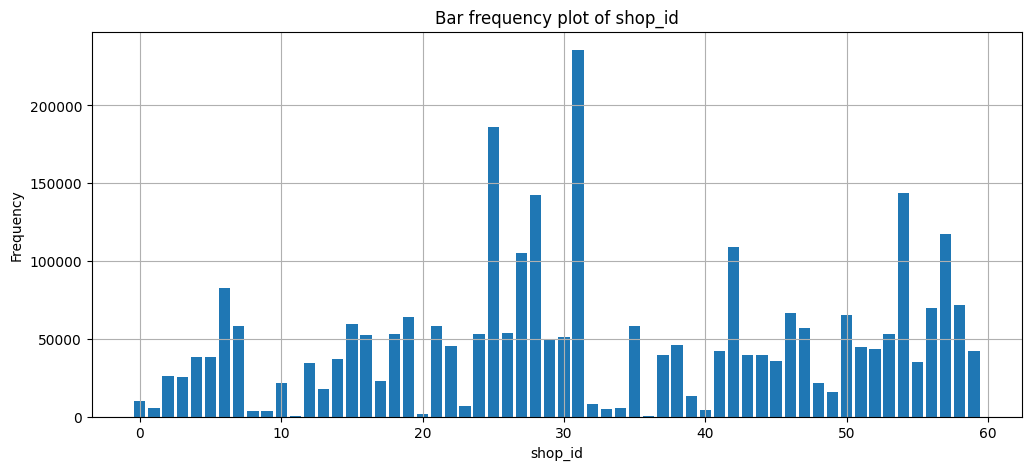

In [16]:
categorical_analysis_shop_id = categorical_analysis(df_full, 'shop_id')
display(categorical_analysis_shop_id)
categorical_plot(categorical_analysis_shop_id, 'shop_id')

,count,norm_count
item_id,,
20949,31340,1.067494e-02
5822,9408,3.204524e-03
17717,9067,3.088374e-03
2808,7479,2.547474e-03
4181,6853,2.334248e-03
...,...,...
8574,1,3.406170e-07
12579,1,3.406170e-07
15362,1,3.406170e-07


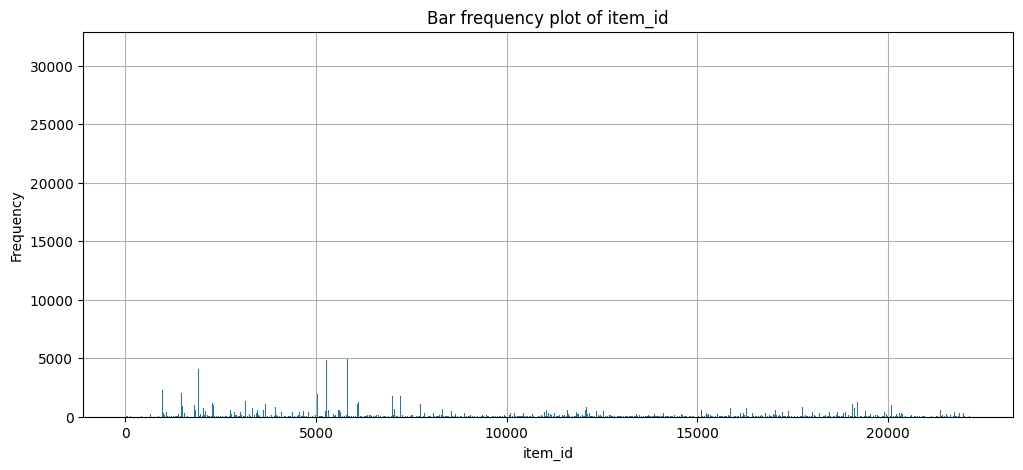

In [17]:
categorical_analysis_item_id = categorical_analysis(df_full, 'item_id')
display(categorical_analysis_item_id)
categorical_plot(categorical_analysis_item_id, 'item_id')

,count,norm_count
item_category_id,,
40,564652,1.923301e-01
30,351591,1.197579e-01
55,339585,1.156684e-01
19,208219,7.092293e-02
37,192674,6.562803e-02
...,...,...
53,3,1.021851e-06
50,2,6.812339e-07
1,2,6.812339e-07


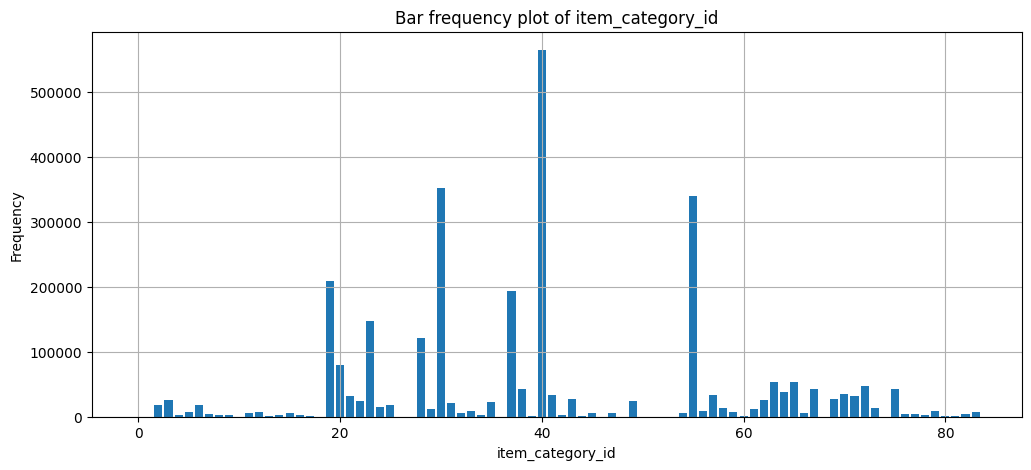

In [18]:
categorical_analysis_item_category_id = categorical_analysis(df_full, 'item_category_id')
display(categorical_analysis_item_category_id)
categorical_plot(categorical_analysis_item_category_id, 'item_category_id')

,count,norm_count
date_block_num,,
11,143246,0.048792
23,130786,0.044548
2,121347,0.041333
0,115690,0.039406
1,108613,0.036995
7,104772,0.035687
6,100548,0.034248
5,100403,0.034199
12,99349,0.033840


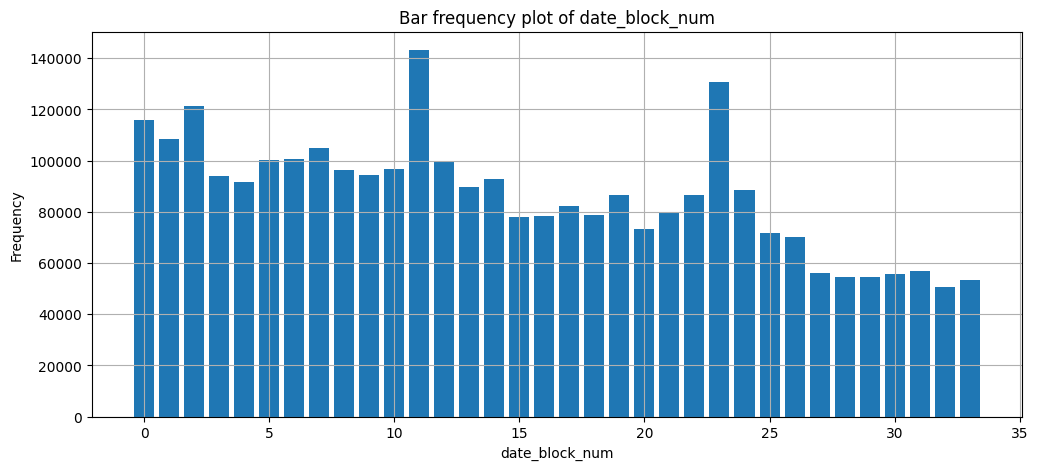

In [19]:
categorical_analysis_date_block_num = categorical_analysis(df_full, 'date_block_num')
display(categorical_analysis_date_block_num)
categorical_plot(categorical_analysis_date_block_num, 'date_block_num')

In [20]:
def numerical_analysis(df, column):
    """
    Funkcja zwraca statystyki dla kolumny kategorycznej
    """
    vc = df[column].value_counts()
    vc_norm = vc / vc.sum()
    return pd.DataFrame({'count': vc, 'norm_count': vc_norm})

def numerical_plot(df_analysis, column):
    """
    Funkcja rysuje wykres słupkowy dla analizy kategorycznej
    """
    plt.figure(figsize=(12, 5))
    plt.hist(df_analysis[column])
    plt.title(f'Hist plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
df_full['item_price']

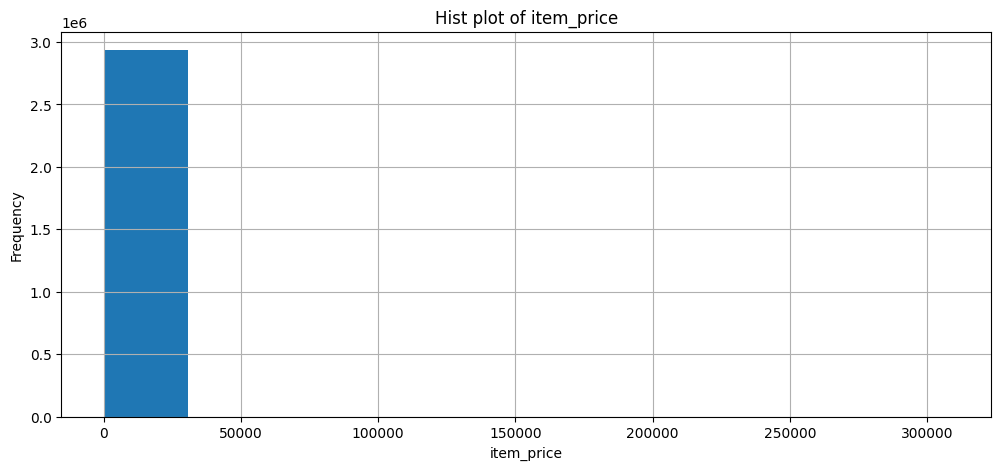

In [21]:
#categorical_analysis_date_block_num = categorical_analysis(df_full, 'date_block_num')
#display(categorical_analysis_date_block_num)
numerical_plot(df_full, 'item_price')

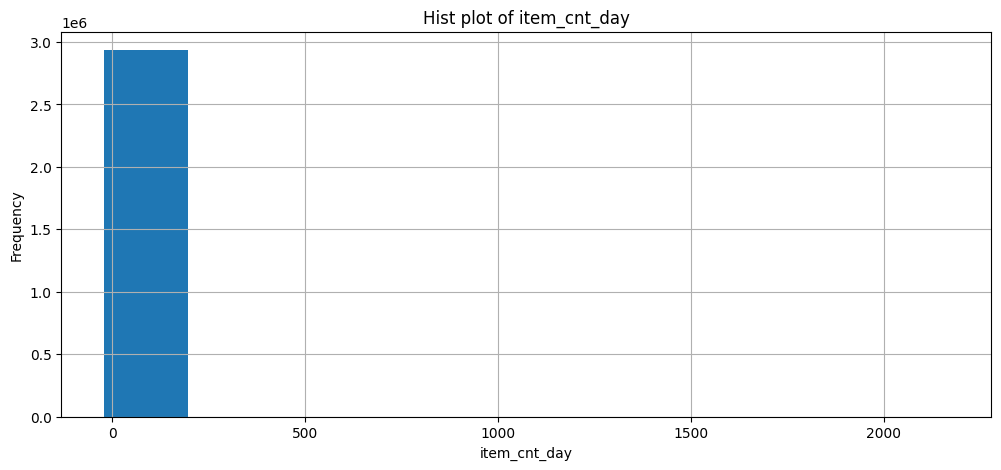

In [22]:
numerical_plot(df_full, 'item_cnt_day')

## 3. **Zaawansowana Analiza cech**
Kazda cecha zostanie przeanalizowana pod kątem wskazania jej cech. Dla zmiennych kategorycznych wskazane będą liczność wraz z wykresami. Dla zmiennych numerycznych wskazane będą ich rozkłady.

In [ ]:
df.groupby('shop_id')['item_id'].nunique().sort_values(ascending=False) 

In [ ]:
df.groupby('item_category_id')['item_id'].nunique().sort_values(ascending=False)

In [ ]:
df.groupby("item_category_id")['item_price'].mean().sort_values(ascending=False)

In [ ]:
# Create histograms for 'item_price' in every 'item_category_id'
unique_categories = np.sort(df['item_category_id'].unique())

plt.figure(figsize=(20, 200))
for i, category in enumerate(unique_categories, 1):
    plt.subplot(len(unique_categories) // 2 + 1, 2, i)
    category_data = df[df['item_category_id'] == category]['item_price']
    category_data.hist(bins=50)
    mean_price = category_data.mean()
    plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_price:.2f}')
    plt.title(f'Category {category} (n={len(category_data)})')
    plt.xlabel('Item Price')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df

In [13]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df = df.sort_values(by=['date', 'shop_id', 'item_id']).reset_index(drop=True)

In [ ]:
df

In [ ]:
plt.figure(figsize=(20, 8))
monthly_sales_aggregated = df.groupby("date_block_num")['item_cnt_day'].sum()
monthly_sales_aggregated.plot()
plt.title('Monthly Sales Aggregated')
plt.xlabel('Consecutive months')
plt.ylabel('Sum per month')
plt.legend()


In [ ]:
monthly_sales_per_shop = df.groupby(["shop_id", "date_block_num"])['item_cnt_day'].sum()
monthly_sales_per_shop_matrix = monthly_sales_per_shop.unstack().to_numpy()

fig, ax = plt.subplots(monthly_sales_per_shop_matrix.shape[0] // 2, 2, figsize=(20, 200))
for i in range(monthly_sales_per_shop_matrix.shape[0]):
    m, n = (i // 2), (i % 2)
    ax[m, n].plot(monthly_sales_per_shop_matrix[i], marker='o')
    ax[m, n].axhline(np.nanmean(monthly_sales_per_shop_matrix[i]), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.nanmean(monthly_sales_per_shop_matrix[i]):.2f}')
    ax[m, n].axhline(np.nanmin(monthly_sales_per_shop_matrix[i]), color='blue', linestyle='dashed', linewidth=1, label=f'Min: {np.nanmin(monthly_sales_per_shop_matrix[i]):.2f}')
    ax[m, n].axhline(np.nanmax(monthly_sales_per_shop_matrix[i]), color='blue', linestyle='dashed', linewidth=1, label=f'Max: {np.nanmax(monthly_sales_per_shop_matrix[i]):.2f}')
    ax[m, n].set_xlim(-1, 35)
    ax[m, n].set_ylim(min(0, np.nanmin(monthly_sales_per_shop_matrix[i])), 1.1 * np.nanmax(monthly_sales_per_shop_matrix[i]))
    ax[m, n].grid(True)
    ax[m, n].set_title(f'Monthly Sales Shop={i}')
    ax[m, n].set_xlabel('Consecutive months')
    ax[m, n].set_ylabel('Sum per month')
    ax[m, n].legend()

plt.tight_layout()
plt.show()

In [ ]:
def check_value_set_difference_dfs(df1, df2, col):
    """Check what fraction of the values in col in df1 (test) are included in df2 (train). Returns difference values."""
    df1_uq = df1[col].unique()
    df2_uq = df2[col].unique()

    overlap_index = np.isin(df1_uq, df2_uq)
    print(f"{overlap_index.mean()} values from {col} in test are present in train")
    print("Length of non-overlapping values in test:", (~overlap_index).sum())

    return df1_uq[~overlap_index]

_df_test = pd.read_csv(".data/test.csv")
_df = pd.read_csv(".data/sales_train.csv")
check_value_set_difference_dfs(_df_test, _df, "shop_id")
check_value_set_difference_dfs(_df_test, _df, "item_id")

In [ ]:
# Price discrepancy for the same item in different shops. Value represents the fraction of items
# where the price differs for at least 2 shops
(df[['item_id', 'item_price']].groupby("item_id")['item_price'].nunique().values > 1).mean() # type: ignore

In [ ]:
# Fraction of items in the train set where the price is different for the same item in the same shop (at least 2)
(df[['shop_id', 'item_id', 'item_price']].groupby(['shop_id', "item_id"])['item_price'].nunique().values > 1).mean() # type: ignore

## x. **Zapisanie utworzonych danych do pliku w formacie `parquet`**

In [1]:
df_full

NameError: name 'df_full' is not defined

In [23]:
df_full.to_parquet(".data/df_full.parquet")